In [56]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#Display
pd.options.display.max_columns = 78
pd.options.display.max_rows = 78

In [58]:
# Importar el df limpio de Berlin, Germany.
df = pd.read_csv('Berlin_76_Clean.csv')
df

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,prenzlauer berg,https://a0.muscache.com/pictures/airflow/Hosti...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,100.00,80.00,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,prenzlauer berg,1.0,1.0,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...",105.000000,63,730,63,63,730,730,63.0,730.0,t,0,4,4,250,2025-06-21,149,1,0,79,0,126,13230.0,2009-06-20,2025-03-02,4.63,4.67,4.52,4.65,4.70,4.92,4.61,No License,f,1,1,0,0,0.76
1,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,prenzlauer berg,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",Born in Munich - lives in and loves Berlin. Wo...,within a day,50.00,0.00,f,https://a0.muscache.com/im/users/33852/profile...,https://a0.muscache.com/im/users/33852/profile...,prenzlauer berg,1.0,1.0,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,7,2.5,2.5 baths,4.0,4.0,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...",135.000000,6,14,6,6,14,14,6.0,14.0,t,0,0,5,193,2025-06-21,7,0,0,29,0,0,0.0,2015-08-09,2020-01-04,5.00,5.00,5.00,5.00,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.06
2,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,prenzlauer berg,https://a0.muscache.com/pictures/508703/24988a...,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany","From Berlin, Germany. We love to travel!",within a day,100.00,25.00,t,https://a0.muscache.com/im/users/55531/profile...,https://a0.muscache.com/im/users/55531/profile...,prenzlauer berg,4.0,5.0,"['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,1,1.0,1 bath,0.0,1.0,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...",75.000000,150,1125,150,150,1125,1125,150.0,1125.0,t,0,0,0,262,2025-06-21,26,0,0,91,0,0,0.0,2010-06-29,2023-11-30,4.68,5.00,4.85,4.70,4.85

In [59]:
# Checar Na's
df.isnull().sum()

listing_url                                     0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0
host_picture_url                                0
host_neighbourhood                              0


In [60]:
# Información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   14187 non-null  object 
 1   last_scraped                                  14187 non-null  object 
 2   source                                        14187 non-null  object 
 3   name                                          14187 non-null  object 
 4   description                                   14187 non-null  object 
 5   neighborhood_overview                         14187 non-null  object 
 6   picture_url                                   14187 non-null  object 
 7   host_id                                       14187 non-null  int64  
 8   host_url                                      14187 non-null  object 
 9   host_name                                     14187 non-null 

In [61]:
# Latitude and Longitude serán excluidos para el rango IQR, debido a que son coordenadas geográficas.
## Primero corregir formato de algunas columnas
#df['host_id'] = df['host_id'].apply(str)
df['last_scraped'] = pd.to_datetime(df['last_scraped'], errors = 'coerce')
df['host_since'] = pd.to_datetime(df['host_since'], errors = 'coerce')
df['first_review'] = pd.to_datetime(df['first_review'], errors= 'coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors= 'coerce')
#df['latitude'] = df['latitude'].astype(str)
#df['longitude'] = df['longitude'].astype(str)
df['host_id'] = df['host_id'].apply(str)
df['latitude'] = df['latitude'].apply(str)
df['longitude'] = df['longitude'].apply(str)


# Corroborar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   14187 non-null  object        
 1   last_scraped                                  14187 non-null  datetime64[ns]
 2   source                                        14187 non-null  object        
 3   name                                          14187 non-null  object        
 4   description                                   14187 non-null  object        
 5   neighborhood_overview                         14187 non-null  object        
 6   picture_url                                   14187 non-null  object        
 7   host_id                                       14187 non-null  object        
 8   host_url                                      14187 non-null  obje

In [62]:
# Separar el df por variables cualitativas y cuantitativas
#cuantitativas = df.iloc[:, [14,15,27,20,21,28,30,31] + list(range(33,50))]
#cualitativas = df.iloc[:, list(range(0,14)) + [16,17,18,19,22,23,24,25,26,27,]] #inicio fin, pero excluye el fin, si queremos la columna 13, tendría que ser con 14

cualitativas = df.select_dtypes(include=['object','datetime64[ns]']).copy()
cuantitativas = df.select_dtypes(include= ['int64','float64']).copy()

print("Cualitativas:", cualitativas.columns.tolist())
print("Cuantitativas:", cuantitativas.columns.tolist())

Cualitativas: ['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']
Cuantitativas: ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights

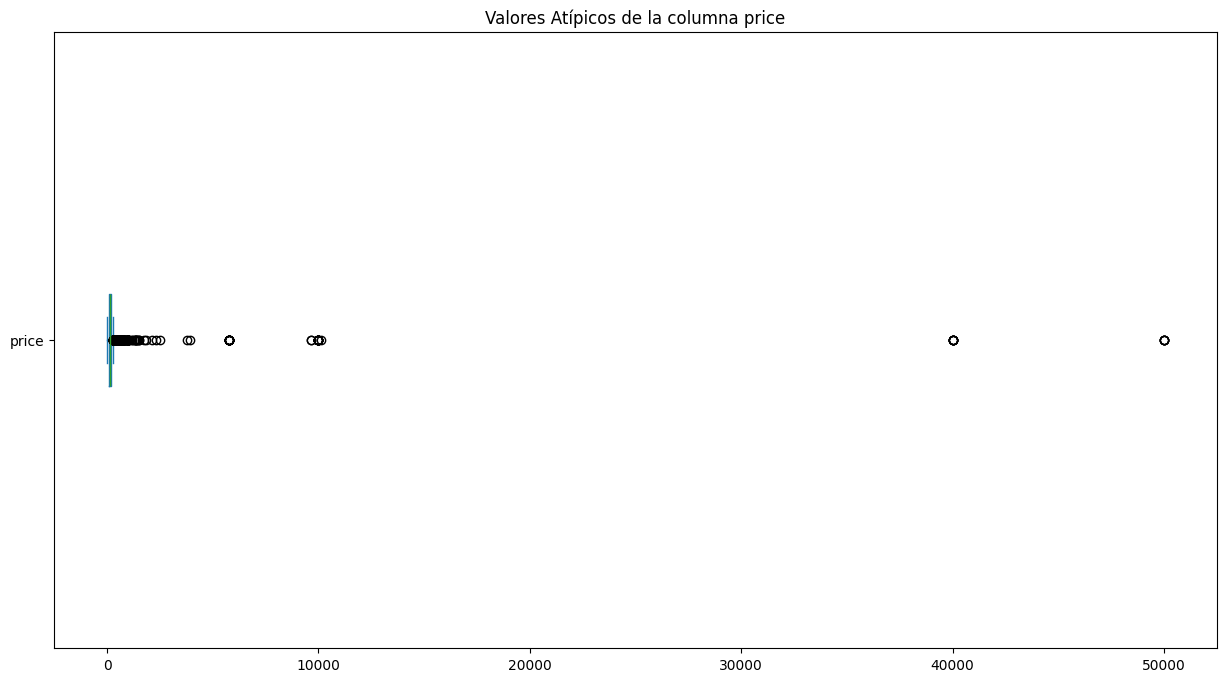

In [63]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas['price'].plot(kind='box', vert=False)
#cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos de la columna price")
plt.show() #dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

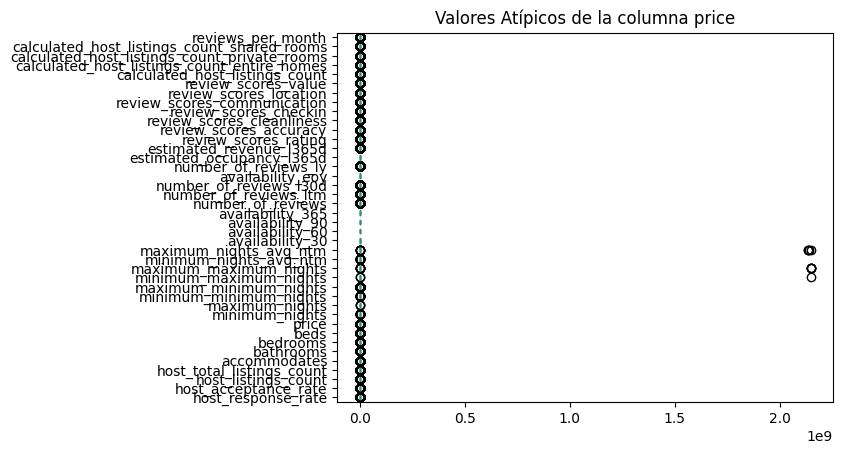

In [64]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos de la columna price")
plt.show() #dibujamos el diagrama

In [65]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_response_rate                                116.680000
host_acceptance_rate                              115.500000
host_listings_count                                11.000000
host_total_listings_count                          16.000000
accommodates                                        7.000000
bathrooms                                           1.000000
bedrooms                                            1.000000
beds                                                3.500000
price                                             299.181341
minimum_nights                                    227.000000
maximum_nights                                   2665.500000
minimum_minimum_nights                            227.000000
maximum_minimum_nights                            225.500000
minimum_maximum_nights                           2587.500000
maximum_maximum_nights                           2539.500000
minimum_nights_avg_ntm                            227.00000

In [66]:
#Método aplicando desviación estandar. Encuentro los valores extremos
#y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido: ", Limite_Superior)
print("Limite inferior permitido: ", Limite_Inferior)

Limite superior permitido:  host_response_rate                              1.511405e+02
host_acceptance_rate                            1.556870e+02
host_listings_count                             3.542421e+02
host_total_listings_count                       4.207019e+02
accommodates                                    8.804726e+00
bathrooms                                       2.592349e+00
bedrooms                                        3.642078e+00
beds                                            6.127072e+00
price                                           4.222370e+03
minimum_nights                                  2.009854e+02
maximum_nights                                  1.941110e+03
minimum_minimum_nights                          1.985766e+02
maximum_minimum_nights                          2.381453e+02
minimum_maximum_nights                          5.424059e+07
maximum_maximum_nights                          1.087719e+08
minimum_nights_avg_ntm                          1.991247e

In [67]:
# Observar DF
cuantitativas

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00,80.00,1.0,1.0,2,1.0,1.0,2.0,105.000000,63,730,63,63,730,730,63.0,730.0,0,4,4,250,149,1,0,79,0,126,13230.0,4.63,4.67,4.52,4.65,4.70,4.92,4.61,1,1,0,0,0.76
1,50.00,0.00,1.0,1.0,7,2.5,4.0,4.0,135.000000,6,14,6,6,14,14,6.0,14.0,0,0,5,193,7,0,0,29,0,0,0.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1,1,0,0,0.06
2,100.00,25.00,4.0,5.0,1,1.0,0.0,1.0,75.000000,150,1125,150,150,1125,1125,150.0,1125.0,0,0,0,262,26,0,0,91,0,0,0.0,4.68,5.00,4.85,4.70,4.85,4.60,4.45,4,4,0,0,0.14
3,100.00,0.00,4.0,4.0,4,1.0,1.0,2.0,173.672536,93,365,93,93,365,365,93.0,365.0,0,0,0,0,48,0,0,0,0,0,0.0,4.72,4.86,4.86,4.93,4.86,4.67,4.71,2,2,0,0,0.26
4,100.00,94.00,2.0,5.0,2,1.0,0.0,1.0,28.000000,92,365,92,92,365,365,92.0,365.0,0,0,17,111,298,0,0,29,0,0,0.0,4.77,4.82,4.71,4.89,4.92,4.88,4.65,1,1,0,0,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,90.00,60.00,2.0,2.0,1,1.0,1.0,1.0,74.000000,1,365,1,1,365,365,1.0,365.0,30,60,90,365,0,0,0,195,0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,0,2,0,0.00
14183,100.00,63.00,70.0,70.0,3,1.0,1.0,1.0,68.000000,92,365,92,92,365,365,92.0,365.0,20,50,80,355,0,0,0,185,0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69,69,0,0,0.00
14184,100.00,63.00,70.0,70.0,2,1.0,1.0,1.0,86.000000,92,365,92,92,365,365,92.0,365.0,29,59,89,364,0,0,0,194,0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69,69,0,0,0.00
14185,88.88,89.89,1.0,2.0,4,1.0,1.0,2.0,74.000000,1,365,1,1,365,365,1.0,365.0,19,49,79,354,0,0,0,184,0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0,0,0.00


In [68]:
cuantitativas.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,1.418700e+04,1.418700e+04,14187.000000,1.418700e+04,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,1.418700e+04,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000
mean,89.459903,84.139256,25.603863,29.529922,3.045535,1.142313,1.306548,1.805667,192.474327,40.140692,543.933319,39.453302,44.813985,1.519921e+05,6.061365e+05,40.275449,6.040480e+05,8.008740,18.926482,31.372313,140.280257,42.945161,9.526256,0.830549,75.817861,8.895679,77.772891,1.132669e+04,3.634238,3.663519,3.589533,3.686633,3.683340,3.636286,3.549572,13.826108,11.772750,1.854938,0.136111,0.969922
std,20.560183,23.849255,109.546072,130.390670,1.919730,0.483345,0.778510,1.440468,1343.298604,53.614919,465.725596,53.041085,64.443763,1.802953e+07,3.605525e+07,52.949756,3.593187e+07,10.329108,21.630535,33.225822,135.961767,98.019187,21.392005,1.837096,73.783390,20.847887,101.521664,3.389687e+04,2.045460,2.059479,2.027402,2.070695,2.072863,2.043231,2.006185,50.094695,48.938187,10.575454,1.418697,1.835620
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,88.880000,88.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,90.000000,2.000000,98.000000,2.000000,3.000000,1.500000e+02,1.820000e+02,2.000000,1.800000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.895000,4.000000,3.500000,4.000000,3.885000,4.000000,3.450000,1.000000,0.000000,0.000000,0.000000,0.010000
50%,98.000000,89.890000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,115.000000,5.000000,365.000000,4.000000,6.000000,3.650000e+02,7.000000e+02,5.000000,3.650000e+02,2.000000,10.000000,19.000000,105.000000,7.000000,1.000000,0.000000,61.000000,0.000000,13.000000,1.258286e+03,4.750000,4.810000,4.690000,4.860000,4.860000,4.750000,4.630000,1.000000,1.000000,0.000000,0.000000,0.240000
75%,100.000000,99.000000,5.000000,7.000000,4.000000,1.000000,1.000000,2.000000,173.672536,92.000000,1125.000000,92.000000,92.000000,1.125000e+03,1.125000e+03,92.000000,1.125000e+03,15.000000,36.000000,61.000000,270.000000,38.000000,10.000000,1.000000,148.000000,9.000000,166.000000,1.555500e+04,4.950000,4.970000,4.930000,5.000000,5.000000,4.930000,4.830000,4.000000,2.000000,1.000000,0.000000,1.240000
max,100.000000,100.000000,1607.000000,2083.000000,16.000000,15.000000,14.000000,50.000000,50000.000000,1125.000000,9999.000000,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,28

In [69]:
#Obtenemos datos limpios del Dataframe
df_sd = cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_sd

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00,80.00,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,63.0,730.0,730.0,63.0,730.0,0,4,4,250,149.0,1.0,0.0,79,0.0,126,13230.0,4.63,4.67,4.52,4.65,4.70,4.92,4.61,1.0,1.0,0.0,0.0,0.76
1,50.00,NaN,1.0,1.0,7.0,2.5,NaN,4.0,135.000000,6.0,14.0,6.0,6.0,14.0,14.0,6.0,14.0,0,0,5,193,7.0,0.0,0.0,29,0.0,0,0.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0,0.0,0.0,0.06
2,100.00,25.00,4.0,5.0,1.0,1.0,0.0,1.0,75.000000,150.0,1125.0,150.0,150.0,1125.0,1125.0,150.0,1125.0,0,0,0,262,26.0,0.0,0.0,91,0.0,0,0.0,4.68,5.00,4.85,4.70,4.85,4.60,4.45,4.0,4.0,0.0,0.0,0.14
3,100.00,NaN,4.0,4.0,4.0,1.0,1.0,2.0,173.672536,93.0,365.0,93.0,93.0,365.0,365.0,93.0,365.0,0,0,0,0,48.0,0.0,0.0,0,0.0,0,0.0,4.72,4.86,4.86,4.93,4.86,4.67,4.71,2.0,2.0,0.0,0.0,0.26
4,100.00,94.00,2.0,5.0,2.0,1.0,0.0,1.0,28.000000,92.0,365.0,92.0,92.0,365.0,365.0,92.0,365.0,0,0,17,111,298.0,0.0,0.0,29,0.0,0,0.0,4.77,4.82,4.71,4.89,4.92,4.88,4.65,1.0,1.0,0.0,0.0,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,90.00,60.00,2.0,2.0,1.0,1.0,1.0,1.0,74.000000,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,60,90,365,0.0,0.0,0.0,195,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0,0.0,2.0,0.0,0.00
14183,100.00,63.00,70.0,70.0,3.0,1.0,1.0,1.0,68.000000,92.0,365.0,92.0,92.0,365.0,365.0,92.0,365.0,20,50,80,355,0.0,0.0,0.0,185,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.0,69.0,0.0,0.0,0.00
14184,100.00,63.00,70.0,70.0,2.0,1.0,1.0,1.0,86.000000,92.0,365.0,92.0,92.0,365.0,365.0,92.0,365.0,29,59,89,364,0.0,0.0,0.0,194,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.0,69.0,0.0,0.0,0.00
14185,88.88,89.89,1.0,2.0,4.0,1.0,1.0,2.0,74.000000,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,19,49,79,354,0.0,0.0,0.0,184,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.0,0.0,0.0,0.00


In [70]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = df_sd.isnull().sum()
valores_nulos

host_response_rate                              598
host_acceptance_rate                            569
host_listings_count                             141
host_total_listings_count                       142
accommodates                                    269
bathrooms                                       158
bedrooms                                        271
beds                                            207
price                                            42
minimum_nights                                   57
maximum_nights                                    3
minimum_minimum_nights                           59
maximum_minimum_nights                          270
minimum_maximum_nights                            1
maximum_maximum_nights                            4
minimum_nights_avg_ntm                           59
maximum_nights_avg_ntm                            4
availability_30                                   0
availability_60                                   0
availability

In [71]:
#Info DF
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            14187 non-null  float64
 1   host_acceptance_rate                          14187 non-null  float64
 2   host_listings_count                           14187 non-null  float64
 3   host_total_listings_count                     14187 non-null  float64
 4   accommodates                                  14187 non-null  int64  
 5   bathrooms                                     14187 non-null  float64
 6   bedrooms                                      14187 non-null  float64
 7   beds                                          14187 non-null  float64
 8   price                                         14187 non-null  float64
 9   minimum_nights                                14187 non-null 

In [72]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
# Copia del dataframe
df_sd_final = df_sd.copy()

# Variables a imputar con MEDIANA
vars_mediana = [
    'accommodates','bathrooms','bedrooms','beds', 
    'minimum_nights','maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
    'maximum_maximum_nights',
    'availability_30','availability_60','availability_90','availability_365',
    'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly',
    'estimated_occupancy_l365d',
    'price','estimated_revenue_l365d','host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

# Variables a imputar con MEDIA
vars_media = [
    'host_response_rate','host_acceptance_rate',
    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication',
    'review_scores_location','review_scores_value', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'reviews_per_month']

# Sustituir con Mediana
for col in vars_mediana:
    if col in df_sd_final.columns:
        df_sd_final[col] = df_sd_final[col].fillna(df_sd[col].median())

# Sustituir con Media
for col in vars_media:
    if col in df_sd_final.columns:
        df_sd_final[col] = df_sd_final[col].fillna(df_sd[col].mean())

df_sd_final.isnull().sum()


host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0


In [73]:
# Corroborar cambios
mediana_bath = df_sd_final['bathrooms'].median()
print(mediana_bath)

mediana_price = df_sd_final['price'].median()
print(mediana_price)

1.0
115.0


In [74]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, df_sd_final], axis=1)
Datos_limpios

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,prenzlauer berg,https://a0.muscache.com/pictures/airflow/Hosti...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,prenzlauer berg,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.53471,13.4181,Entire rental unit,Entire home/apt,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...",t,2025-06-21,2009-06-20,2025-03-02,No License,f,100.000000,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,63.0,730.0,730.0,63.0,730.0,0,4,4,250,149.0,1.0,0.0,79,0.0,126,13230.0,4.63,4.67,4.52,4.65,4.70,4.92,4.61,1.0,1.0,0.0,0.0,0.76
1,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,prenzlauer berg,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",Born in Munich - lives in and loves Berlin. Wo...,within a day,f,https://a0.muscache.com/im/users/33852/profile...,https://a0.muscache.com/im/users/33852/profile...,prenzlauer berg,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...",t,2025-06-21,2015-08-09,2020-01-04,03/Z/RA/003410-18,f,50.000000,87.618712,1.0,1.0,7.0,2.5,1.0,4.0,135.000000,6.0,14.0,6.0,6.0,14.0,14.0,6.0,14.0,0,0,5,193,7.0,0.0,0.0,29,0.0,0,0.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0,0.0,0.0,0.06
2,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,prenzlauer berg,https://a0.muscache.com/pictures/508703/24988a...,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany","From Berlin, Germany. We love to travel!",within a day,t,https://a0.muscache.com/im/users/55531/profile...,https://a0.muscache.com/im/users/55531/profile...,prenzlauer berg,"['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...",t,2025-06-21,2010-06-29,2023-11-30,No License,f,100.000000,25.000000,4.0,5.0,1.0,1.0,0.0,1.0,75.000000

In [75]:
# Verificar na's
Datos_limpios.isnull().sum()

listing_url                                      0
last_scraped                                     0
source                                           0
name                                             0
description                                      0
neighborhood_overview                            0
picture_url                                      0
host_id                                          0
host_url                                         0
host_name                                        0
host_since                                      13
host_location                                    0
host_about                                       0
host_response_time                               0
host_is_superhost                                0
host_thumbnail_url                               0
host_picture_url                                 0
host_neighbourhood                               0
host_verifications                               0
host_has_profile_pic           

In [76]:
#Sustituir 13 na's en host_since
Datos_limpios['host_since'] = Datos_limpios['host_since'].fillna(method= 'ffill')
Datos_limpios.isnull().sum()

/var/folders/c5/_p39j2b97hb2d064t5tdpypm0000gn/T/ipykernel_34240/4138653267.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Datos_limpios['host_since'] = Datos_limpios['host_since'].fillna(method= 'ffill')


listing_url                                     0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_is_superhost                               0
host_thumbnail_url                              0
host_picture_url                                0
host_neighbourhood                              0
host_verifications                              0
host_has_profile_pic                            0


In [77]:
# Convertir CSV
Datos_limpios.to_csv('Berlin_76_Final.csv')

In [78]:
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   14187 non-null  object        
 1   last_scraped                                  14187 non-null  datetime64[ns]
 2   source                                        14187 non-null  object        
 3   name                                          14187 non-null  object        
 4   description                                   14187 non-null  object        
 5   neighborhood_overview                         14187 non-null  object        
 6   picture_url                                   14187 non-null  object        
 7   host_id                                       14187 non-null  object        
 8   host_url                                      14187 non-null  obje

<Figure size 1500x800 with 0 Axes>

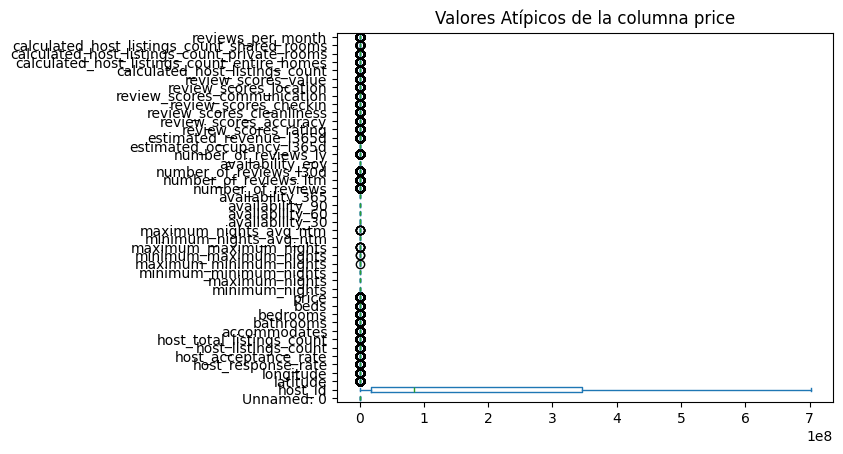

In [79]:
# Revisar nuevo df
df_berlin_final = pd.read_csv('Berlin_76_Final.csv')

# Separar el df por variables cualitativas y cuantitativas
cualitativas_final = df_berlin_final.select_dtypes(include=['object','datetime64[ns]']).copy()
cuantitativas_final = df_berlin_final.select_dtypes(include= ['int64','float64']).copy()

#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas_final.plot(kind='box', vert=False)
plt.title('Valores Atípicos de la columna price')
plt.show() #dibujamos el diagrama

In [80]:
#Error en host_id, latitude y longitude
df_berlin_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    14187 non-null  int64  
 1   listing_url                                   14187 non-null  object 
 2   last_scraped                                  14187 non-null  object 
 3   source                                        14187 non-null  object 
 4   name                                          14187 non-null  object 
 5   description                                   14187 non-null  object 
 6   neighborhood_overview                         14187 non-null  object 
 7   picture_url                                   14187 non-null  object 
 8   host_id                                       14187 non-null  int64  
 9   host_url                                      14187 non-null 

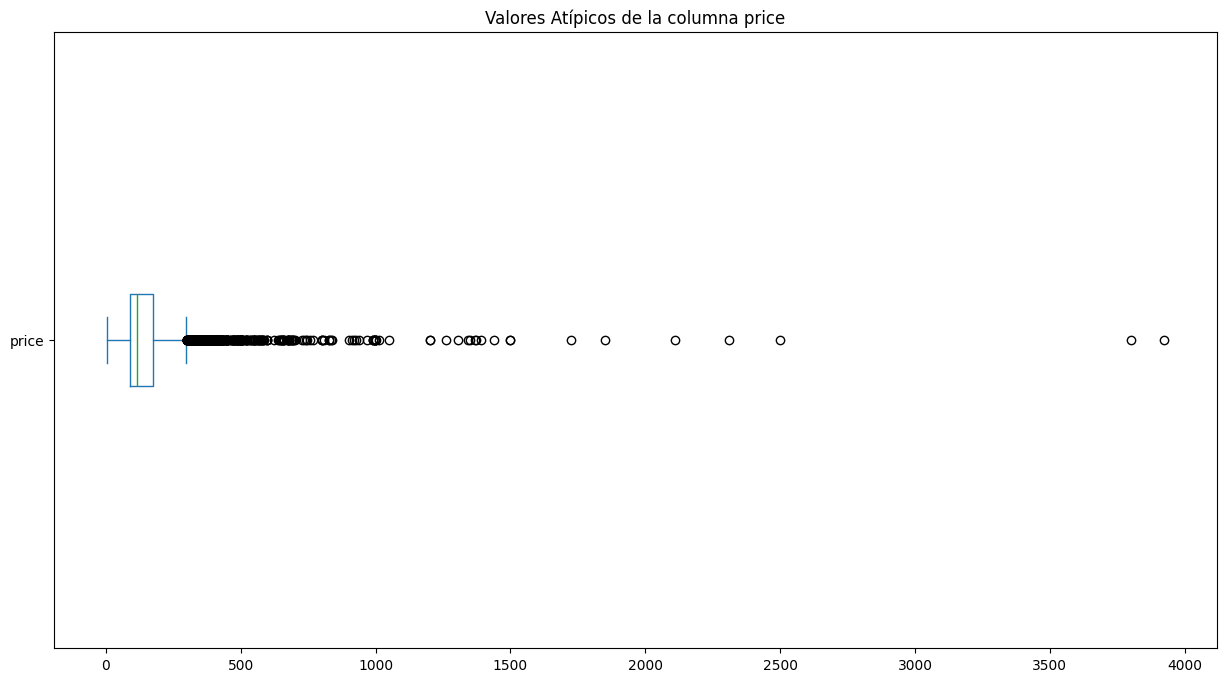

In [81]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas_final['price'].plot(kind='box', vert=False)
#cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atípicos de la columna price')
plt.show() #dibujamos el diagrama

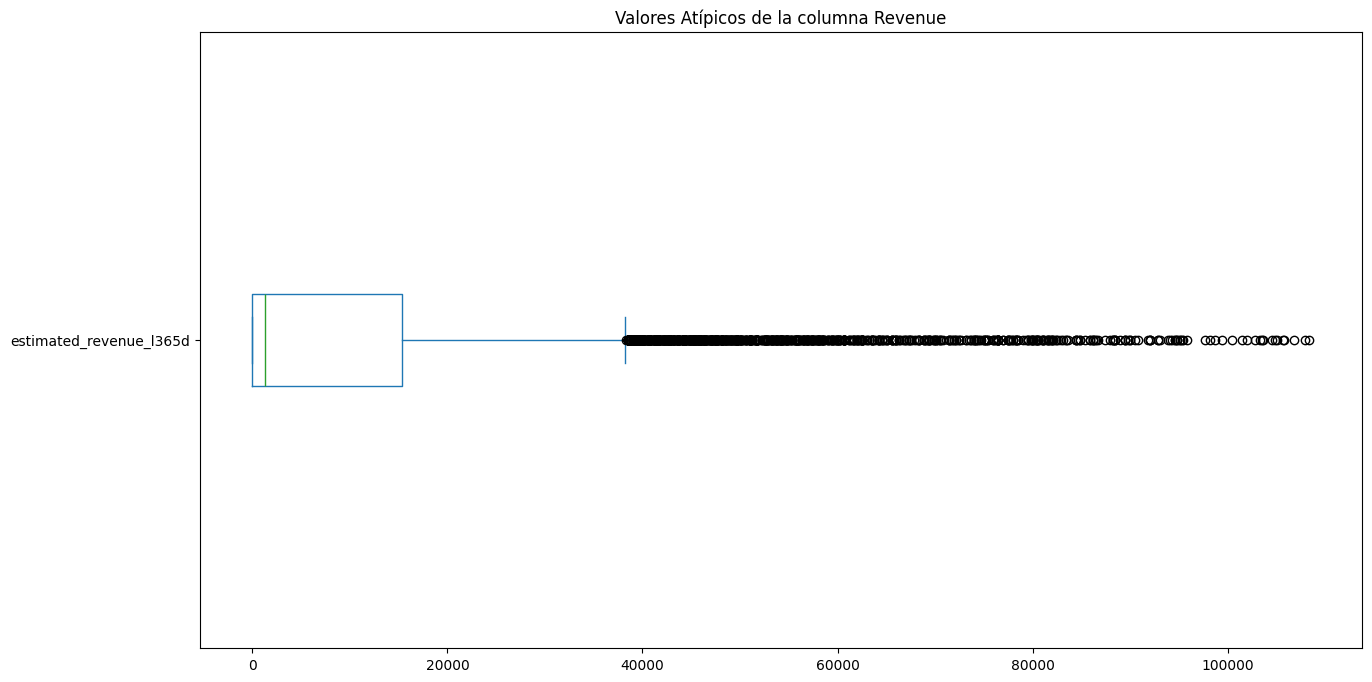

In [82]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas_final['estimated_revenue_l365d'].plot(kind='box', vert=False)
#cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atípicos de la columna Revenue')
plt.show() #dibujamos el diagrama